This notebook represents the analysis of the existing automobile market dynamics to suggest to the new entrant in Geely Autos on pricing their new vehichles. 

<img src="https://www.financialmappers.com.au/wp-content/uploads/2015/10/investments-personal-goals-financial-planning.png", width="200", height="200", align="center" />

The following are the main objectives:
 
1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car

The analysis will be based on a OLS Linear regression model which will also act as the mainstay for pricing the vehichles.

# Data Sourcing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

plt.style.use('ggplot')

auto = pd.read_csv('D:/upgrad/ML/LinearRegression/Assignment/CarPrice_Assignment.csv', encoding='iso-8859-1')

# Data Cleaning

Taking a peek into the loaded dataset

In [2]:
auto.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Looking into the different data types and dimensions of each coumn

In [3]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

Checking the percentage of null values in each column

In [4]:
round(auto.isnull().sum()*100/len(auto),2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

There are no null or empty values in any of the columns so no need to drop or impute any values

#### Splitting the CarName column to company name and Car name and keeping only the company name as suggested.

In [5]:
auto['company'] = auto['CarName'].apply(lambda x: x.split(' ')[0])

Checking the company names to find any invalid or epetitive values

In [6]:
auto['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Correcting the invalid and repetitive values

In [7]:
# Correcting the invalid values
auto.company = auto.company.str.lower()

"""
Method that inds and corrects invalid company names

@Author Aryan Singh
"""
def correctCompany(company):
    nameMap = {'maxda':'mazda', 'porcshce':'porsche','toyouta':'toyota', 'vokswagen':'volkswagen','vw':'volkswagen'}
    if company in nameMap:
        return nameMap[company]
    else:
        return company
    
auto['company'] = auto['company'].apply(correctCompany)

# Dropping the Car Name to keep only company as dependent variable

auto.drop('CarName', inplace=True, axis = 1)

auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

Changing cylinder number and door number to a numerical columns

In [8]:
auto['cylindernumber'] = auto['cylindernumber'].map({ 'one':1, 'two':2, 'three':3, 'four': 4, 'five': 5, 'six': 6, 'eight':8, 'twelve': 12})

In [9]:
auto['doornumber'] = auto['doornumber'].map({ 'two':2, 'four': 4})

Remove the car_ID column as it does not add any value to the model.

In [10]:
auto.drop('car_ID', axis=1, inplace=True)

In [11]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null int64
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg      

# Data Understanding

A few terms to look at:

1. **Symboling**: Symboling is a number between -3 and 3 which is used to express car safety. According to symboling convention -3 is considered the safest rating and +3 signifies most risky cars.

2. **Aspiration**: If std then air intake into the combustion engine happens due to atmosoheric pressure, if turbo then the air is forced by the help of a turbocharger. The latter system being more expensive.

3. **Compression Ratio**: The ratio of the volume of the cylinder and the combustion chamber when the piston is at the bottom. Higher the compression ratio more powerful the engine

### Deriving Metrics

Looking at the horsepower per engine size:

In [12]:
auto['hpes'] = round(auto['horsepower']/auto['enginesize'],2)

Looking at the approx volume per weight of the car

In [13]:
auto['vpw'] = round((auto['carlength']*auto['carwidth']*auto['carheight'])/auto['curbweight'],2)

Peak RPM is itself a weak driver but maybe peak rpm per engine size would be a good enough driver.

In [14]:
auto['prpm_es'] = round(auto['peakrpm']/auto['enginesize'],2)

In [15]:
# Taking a peak into new variables
auto.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company,hpes,vpw,prpm_es
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,9.0,111,5000,21,27,13495.0,alfa-romero,0.85,207.23,38.46
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,9.0,111,5000,21,27,16500.0,alfa-romero,0.85,207.23,38.46
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,9.0,154,5000,19,26,16500.0,alfa-romero,1.01,208.14,32.89
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,10.0,102,5500,24,30,13950.0,audi,0.94,271.64,50.46
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,8.0,115,5500,18,22,17450.0,audi,0.85,225.47,40.44


# Exploratory Data Analysis

### Bivariate Analysis Between Quantitative Variables and Price

Lets look at the correlation between the numerical variables in a heatmap to understand the multicolinearity existing in the data:

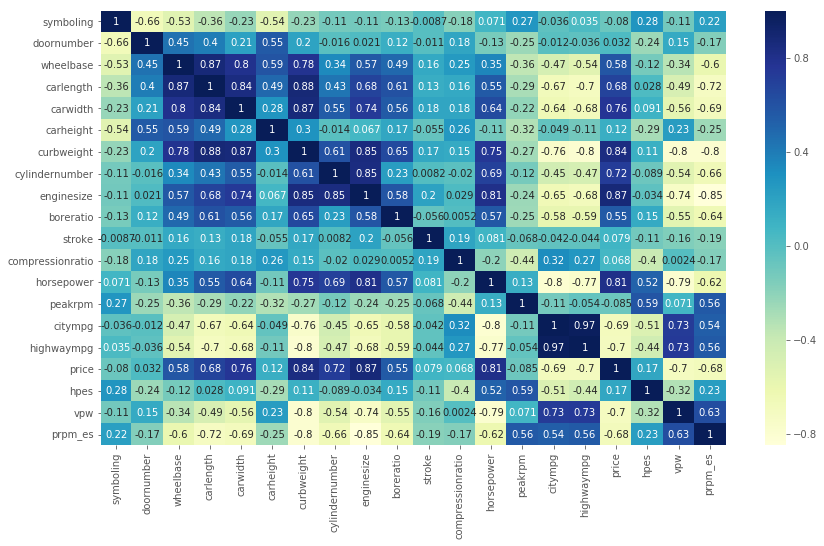

In [16]:
plt.figure(figsize=(14,8))
sns.heatmap(auto.corr(), cmap="YlGnBu", annot=True)

### Inferences From The Heatmap:

1. **Symboling:** Since negative symboling rating means a safer car, the improved safety is reflected with the increase in car price. Thus quite clearly there is a negative correlation between symboling and car price.

Another point to note is that there is a negative correlation between car's dimensional metrics and symboling, which means larger the car safer it is for the passengers.

2. **Wheelbase and Car Length:** Wheelbase and Car length are highly correlated. Infact their impact on price is also quite similar. So we can keep one of these as a dependent variable.

3. **Car Width:** Again car width has a very high corelation with car length. Its impact and correlation with all other variables is also approximately same. This can also be a candidate to drop while modelling because it does not really add any new variation in the model.

*Another point is that the higher the dimensions and weight of the car lower is its mpg vlue. Similar is the impact on peak rpm.*

4. **Car Height:** Car height seems to have a very feeble positive impact on price.

5. **Curb Weight:** Curb weight is very similar to car width in its impact on price. Increase in curb weight increases the price by quite a bit. Moreover it has highly negative impact on mpg value of the vehichle.

6. **Cylinder Number:** As anticipated increasing cyliders has a significant positive impact on 

7. **Engine Size:** Engine size also has a highly positive correlation with Price as well as the dimensions and weight of the vehichle.

8. **Bore Ratio:** Bore ratio also has a medium-high impact on price and driving it upwards. Also, it drives down the mpg values for the vehichle.

9. **Stroke:** Stroke does not seem to have much impact on the price of the vehichle as there is a very weak positive correlation.

10. **Horsepower:** Has a high correlation with engine size as well as the price.

11. **Peak RPM:** Surprisingly peak rpm has a negative correlation with the car price.
 
12. **City MPG and Highway MPG:** The mpg for the vehichle has a negative correlation with car dimensions. On similar lines the cars with high mpg are also on lower ends of price spectrum.

13. **Compression Ratio:** It has a very weak positive correlation with the price. The only standout observation is its hight negative correlation with peak rpm.

14. **Horse Power Per Engine Size:** Horse Power per engine size has a weak positive correlation with the price.

15. **Door Number:** Door number has a weak positive correlation with the dimesions of the car suggesting that larger cars have mostly 4 door variants. However its impact on price is not very significant. 


Removing the variables that are highly corrlated to others and won't be contributing much to the model

In [17]:
auto.drop(['wheelbase','citympg','horsepower','curbweight','cylindernumber'], inplace=True, axis=1)

Lets look at the pairplots to confirm the above observations:

In [18]:
# Dividing the numerical variables into three categories to make the pairplots

# Category 1
auto_cat1 = auto[['enginesize','carlength','carwidth','compressionratio','price']]
# Category 2
auto_cat2 = auto[['symboling','boreratio','stroke','peakrpm','carheight','price']]
# Category 3
auto_cat3 = auto[['highwaympg','hpes','vpw','prpm_es','doornumber', 'price']]



Plotting the **Category 1** variables against price.

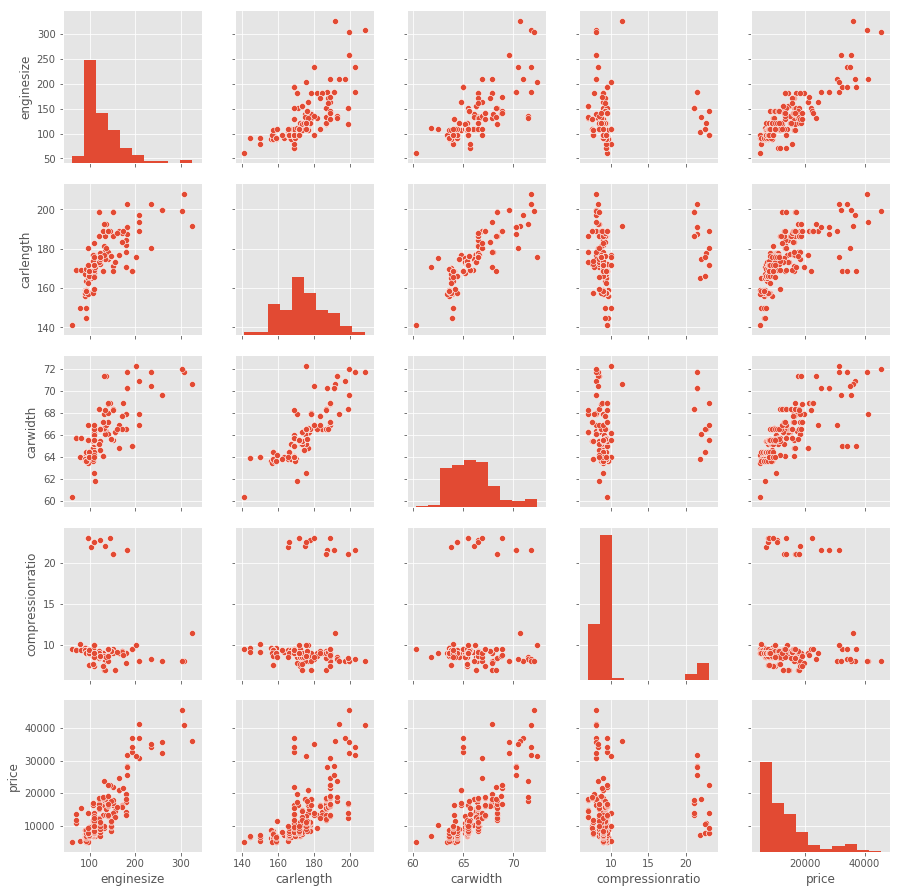

In [19]:
plt.figure(figsize=(14,8))
sns.pairplot(auto_cat1)
plt.show()

Plotting the **Category 2** variables against price.

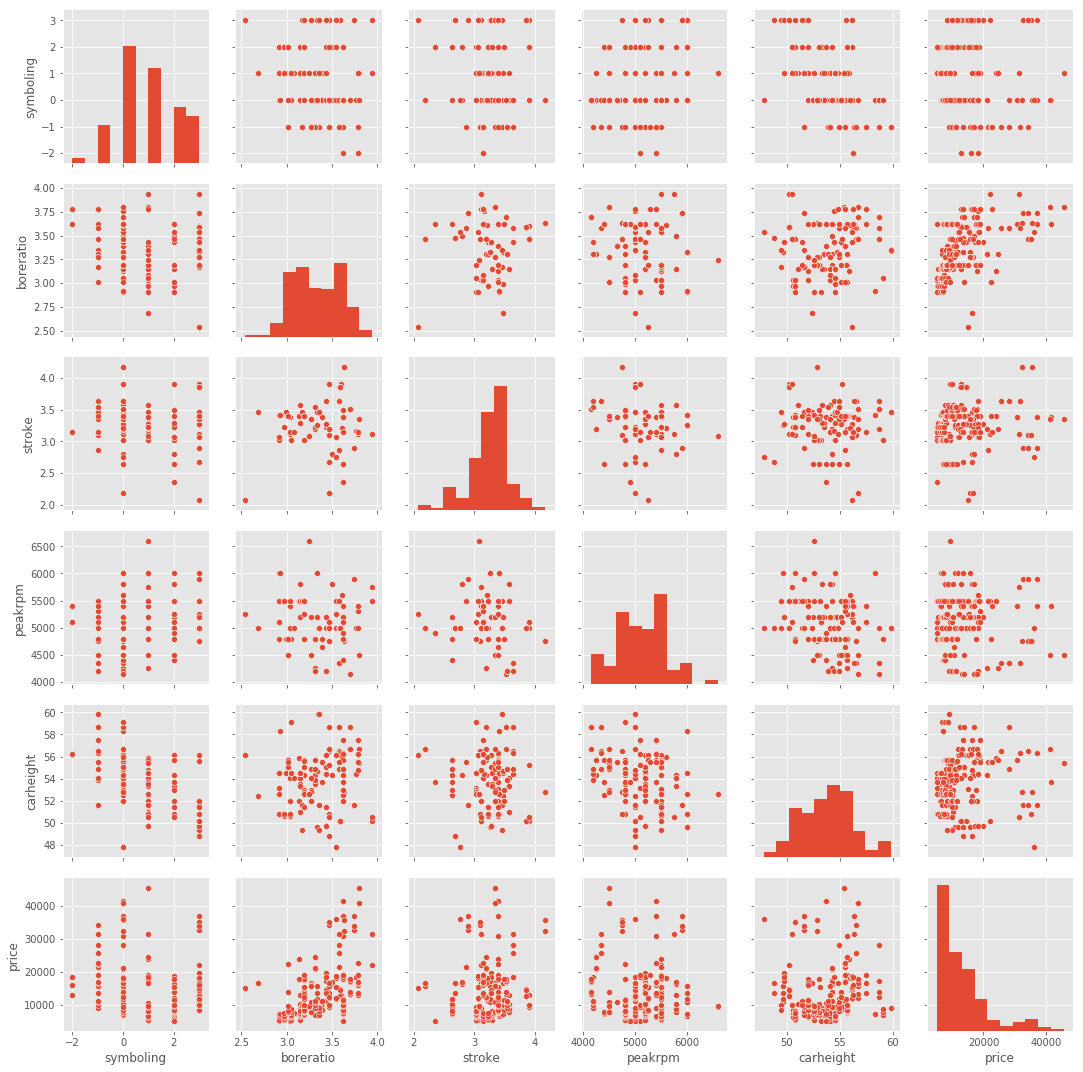

In [20]:
plt.figure(figsize=(14,8))
sns.pairplot(auto_cat2)
plt.show()

Plotting the **Category 3** variables against price.

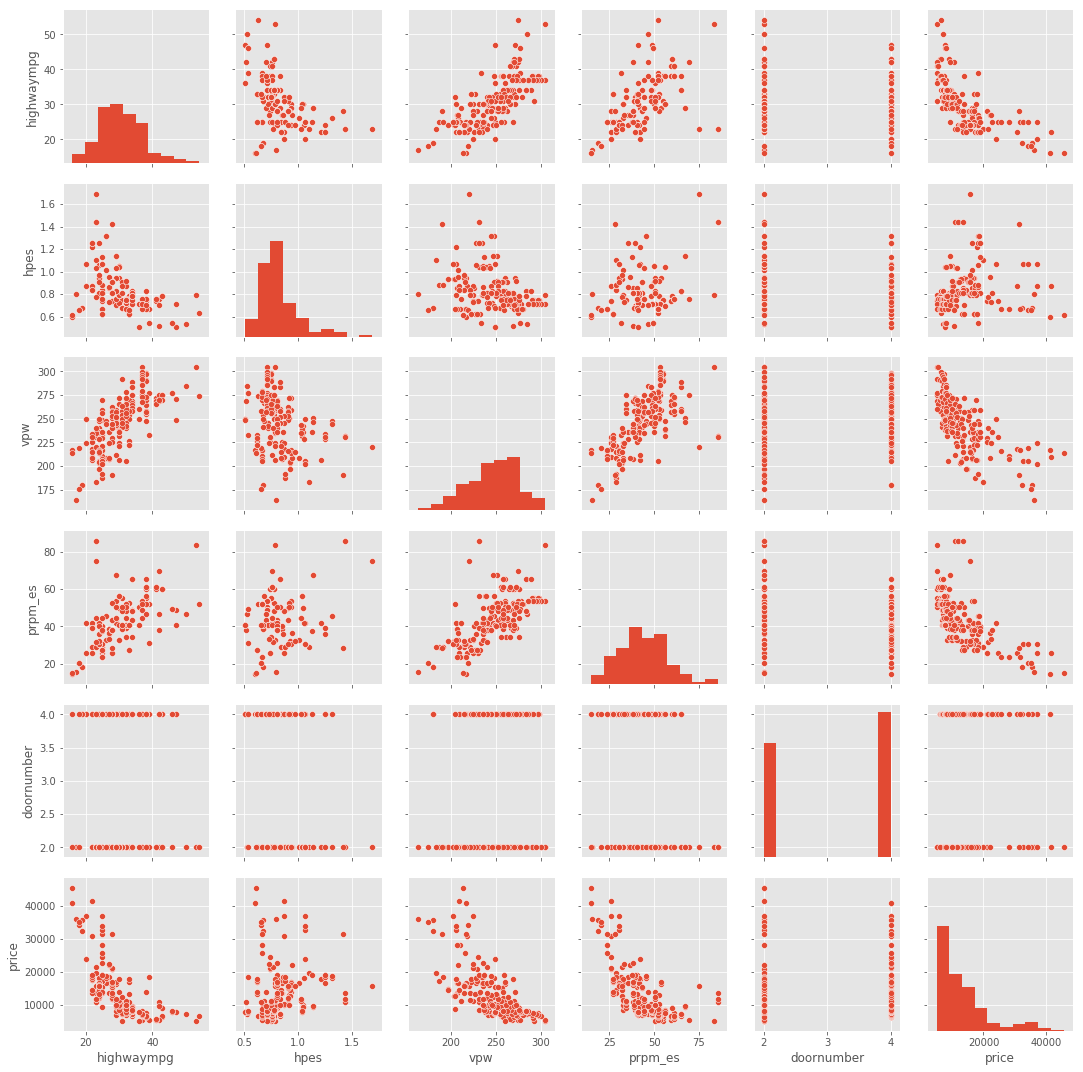

In [21]:
plt.figure(figsize=(14,8))
sns.pairplot(auto_cat3)
plt.show()

Thus the inferences drawn from scatter plot is confirmed by the scatter plots as well

## Bivariate Analysis Between Categorical Variables and Price

### Defining a general function for Bivariate Inferences

In [22]:
"""
Method that takes the data frame as the input and performs the Univariate and Bivariate analysis on the Categorical variables
of the data set.

idf -> Input Data frame
outcome -> the variable against which variables have to be analysed

@Author - Aryan Singh
"""
def describe_categorical(idf, outcome):
    df=idf.copy(deep=True)
    bins = np.linspace(df[outcome].min(), df[outcome].max(), 5)
    df[outcome] = pd.cut(df[outcome],bins)
    from IPython.display import display, HTML
    cols = df.columns
    num_cols = df._get_numeric_data().columns
    cat_variables = list(set(cols) - set(num_cols))
    display(HTML('<h4>Results from describe_categorical function.</h4>'))
    display(HTML('<h5>Univariate Analysis Of the categorical variables</h5>'))
    display(HTML(df[cat_variables].describe().to_html()))
    display(HTML('<br /><h4>Bivariate Analysis of relationship between ' + outcome + ' and categorical variables</h4><br />'))
    for variable in df:
        if((str(variable) in cat_variables) & (str(variable)!=outcome)):
            display(HTML('<h5>Relationship between the ' + outcome + ' and ' + str(variable) + '</h5><br />'))
            ctb=pd.crosstab(df[variable], df[outcome]).apply(lambda r: round(r/r.sum(),2), axis=1)
            display(HTML(ctb.to_html()))
            stacked = ctb.stack().reset_index().rename(columns={0:'value'})
            display(HTML('<h5>Relationship Plot between the ' + outcome + ' and ' + str(variable) + '</h5><br />'))
            plt.figure(figsize=(12,8))
            sns.barplot(x=stacked[variable], y=stacked.value, hue=stacked[outcome])
            plt.xticks(rotation=90) 
            plt.show()   

,fuelsystem,company,price,enginetype,fueltype,enginelocation,drivewheel,aspiration,carbody
count,205,205,204,205,205,205,205,205,205
unique,8,22,4,7,2,2,3,2,5
top,mpfi,toyota,"(5118.0, 15188.5]",ohc,gas,front,fwd,std,sedan
freq,94,32,141,148,185,202,120,168,96


price,"(5118.0, 15188.5]","(15188.5, 25259.0]","(25259.0, 35329.5]","(35329.5, 45400.0]"
fueltype,,,,
diesel,0.55,0.25,0.20,0.00
gas,0.71,0.22,0.04,0.04


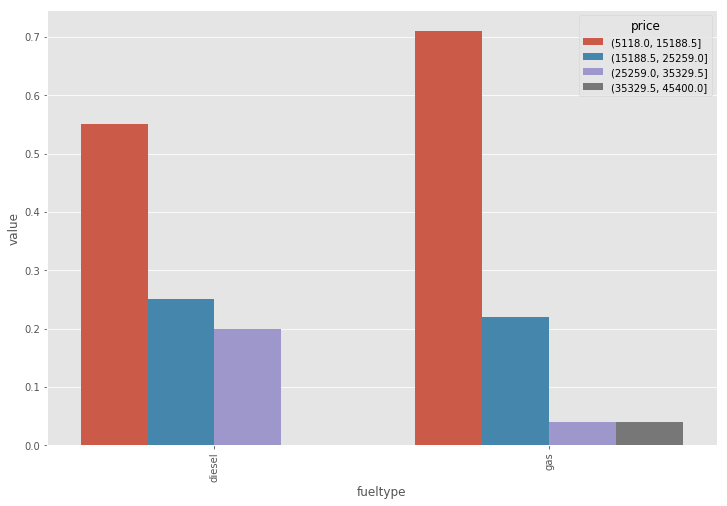

price,"(5118.0, 15188.5]","(15188.5, 25259.0]","(25259.0, 35329.5]","(35329.5, 45400.0]"
aspiration,,,,
std,0.74,0.18,0.04,0.04
turbo,0.49,0.41,0.11,0.00


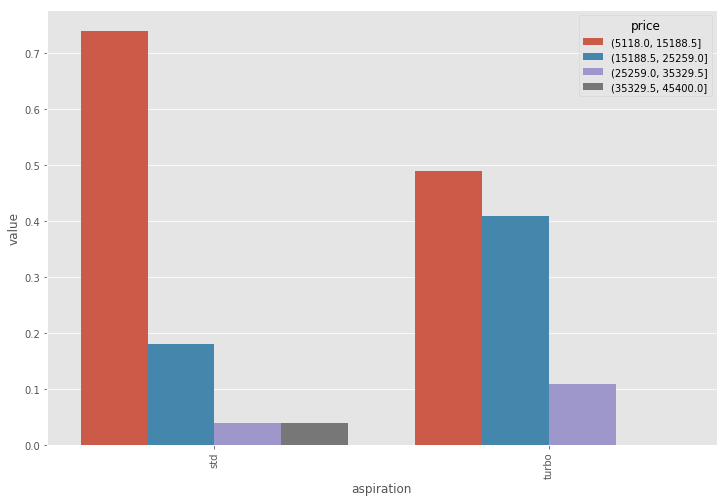

price,"(5118.0, 15188.5]","(15188.5, 25259.0]","(25259.0, 35329.5]","(35329.5, 45400.0]"
carbody,,,,
convertible,0.33,0.33,0.17,0.17
hardtop,0.50,0.00,0.38,0.12
hatchback,0.83,0.16,0.01,0.00
sedan,0.62,0.27,0.05,0.05
wagon,0.72,0.24,0.04,0.00


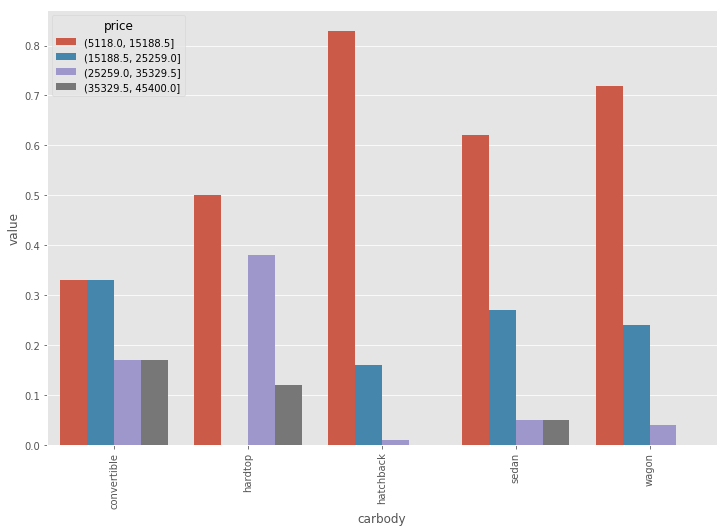

price,"(5118.0, 15188.5]","(15188.5, 25259.0]","(25259.0, 35329.5]","(35329.5, 45400.0]"
drivewheel,,,,
4wd,0.78,0.22,0.00,0.00
fwd,0.94,0.06,0.00,0.00
rwd,0.29,0.47,0.14,0.09


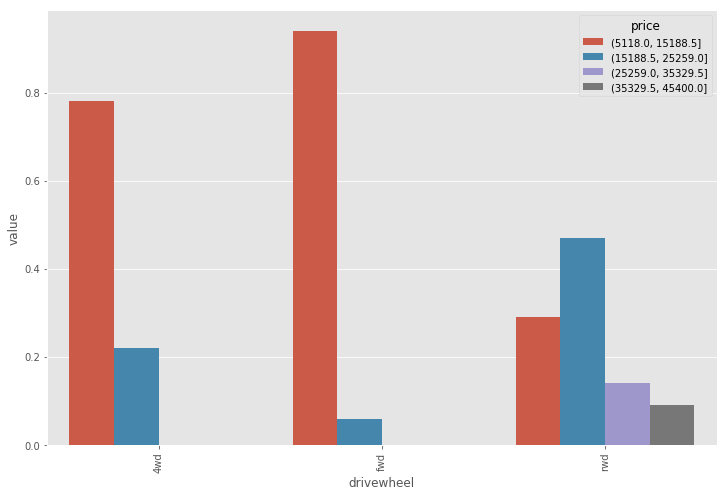

price,"(5118.0, 15188.5]","(15188.5, 25259.0]","(25259.0, 35329.5]","(35329.5, 45400.0]"
enginelocation,,,,
front,0.7,0.22,0.04,0.03
rear,0.0,0.00,0.67,0.33


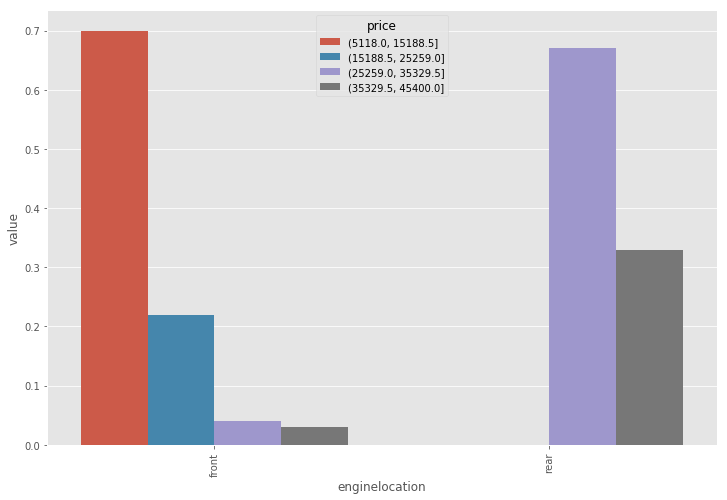

price,"(5118.0, 15188.5]","(15188.5, 25259.0]","(25259.0, 35329.5]","(35329.5, 45400.0]"
enginetype,,,,
dohc,0.25,0.58,0.08,0.08
dohcv,0.00,0.00,1.00,0.00
l,0.42,0.58,0.00,0.00
ohc,0.78,0.17,0.03,0.01
ohcf,0.79,0.00,0.14,0.07
ohcv,0.23,0.38,0.15,0.23
rotor,0.75,0.25,0.00,0.00


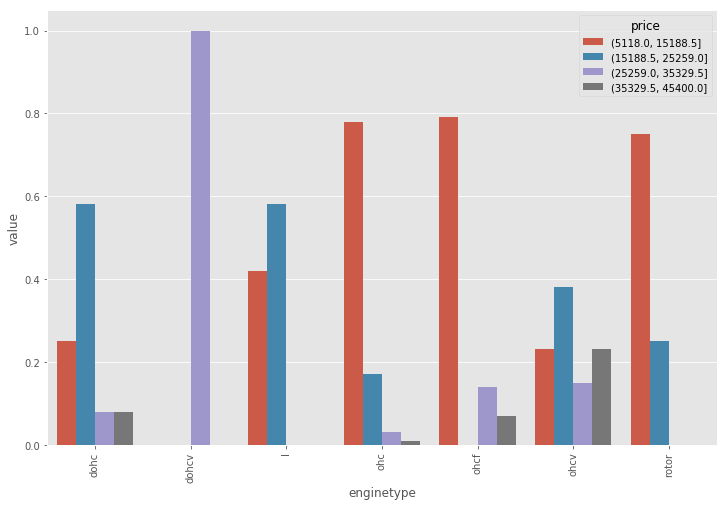

price,"(5118.0, 15188.5]","(15188.5, 25259.0]","(25259.0, 35329.5]","(35329.5, 45400.0]"
fuelsystem,,,,
1bbl,1.00,0.00,0.00,0.00
2bbl,1.00,0.00,0.00,0.00
4bbl,1.00,0.00,0.00,0.00
idi,0.55,0.25,0.20,0.00
mfi,1.00,0.00,0.00,0.00
mpfi,0.43,0.43,0.07,0.07
spdi,1.00,0.00,0.00,0.00
spfi,1.00,0.00,0.00,0.00


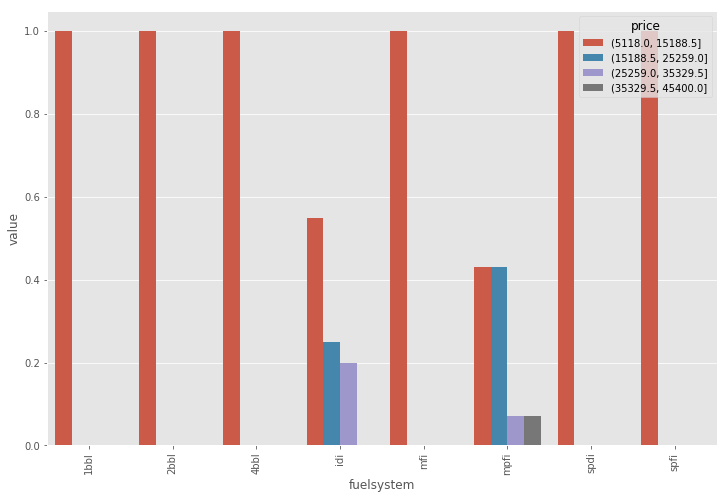

price,"(5118.0, 15188.5]","(15188.5, 25259.0]","(25259.0, 35329.5]","(35329.5, 45400.0]"
company,,,,
alfa-romero,0.33,0.67,0.00,0.00
audi,0.14,0.86,0.00,0.00
bmw,0.00,0.62,0.12,0.25
buick,0.00,0.00,0.75,0.25
chevrolet,1.00,0.00,0.00,0.00
dodge,1.00,0.00,0.00,0.00
honda,1.00,0.00,0.00,0.00
isuzu,1.00,0.00,0.00,0.00
jaguar,0.00,0.00,0.33,0.67


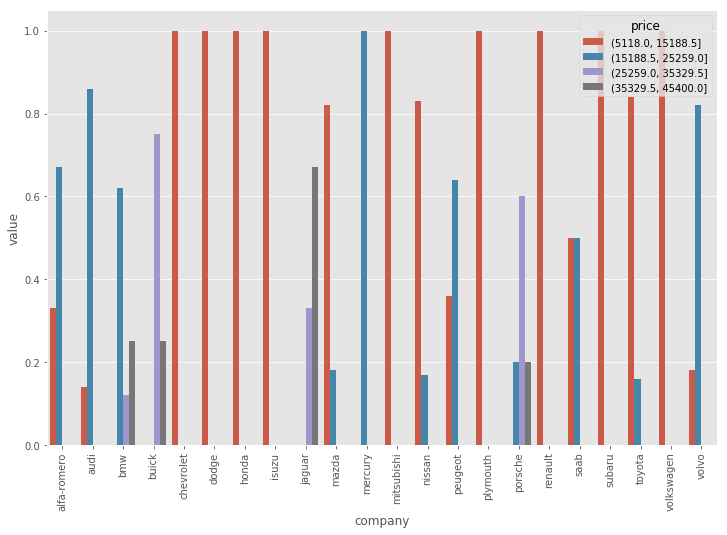

In [23]:
describe_categorical(auto, 'price')

## Inferences:

1. **Fuel Type:** While there are more gas cars as compared to diesel cars, diesel cars have more percentage of expensive vehichles (approx 20%) as compared to gas cars.

2. **Aspiration:** Turbo charged cars have more percentage(around 50%) in the expensive price band whereas in the standard aspiration cars around 70 percent in lower price band. An exception is that there are no cars of most expensive price range i.e. 35000 to 45000 USD in turbo charged category.

3. **Car Body:** **Convertibles** and **Hardtop convertibles** are the one which are in the higher price range with around 34% of convertibles in 25k USD to 45k USD. Similarly hardtops have around 50% vehichles in 25k USD to 50K USD.
On the contrary, **hatchback**, **sedan** and **wagon** fall into the lower side of the spectrum with around 83%, 62% and 72% of the vehichles falling in the lower price bracket of 5 to 15K USD.

4. **drivewheel:** Rear wheel drive cars are usually on expensive side as they are pre-dominantly in higher price bracket.

5. **enginelocation:** Cars with engine located in the rear are more expensive and they are entirely in high price bracket. This might be because there are only 3 Porsche in that bracket and they are hardtop convertibles.

6. **enginetype:** While **dohcv** is the engine type that has around 40% of cars in the expensive bracket. On the contrary, **rotor** type engines are mostly in the cheaper cars category.

7. **fuel system:** idi and mpfi are the fuel systems that power the most expensive cars in the market.

8. **car company:** Porsche and Jaguar are the ones having most high end cars. Also, most of the cars are in 5000 to 15000 USD category.



# Model Preparation and Building

Next we will be building a model to understand which driver vriables impact the price the most and qy=uantify their impact.

### First we need to convert the categorical columns to numeric:

In [24]:
""" 
Function that converts categorical columns to numeric by using pandas dummies

@Author Aryan Singh
"""
def convert_categorical_to_numeric(df):
    cols = df.columns
    num_cols = df._get_numeric_data().columns
    cat_variables = list(set(cols) - set(num_cols))
    for variable in df:
        if(str(variable) in cat_variables):
            var_dummy = pd.get_dummies(df[variable], drop_first=True)
            df = pd.concat([df, var_dummy], axis=1)
            df.drop([variable], axis=1, inplace=True)
    return df

In [25]:
auto = convert_categorical_to_numeric(auto)

Lets check the dataframe shape and peek into it:

In [26]:
auto.shape

(205, 58)

In [27]:
auto.head()

,symboling,doornumber,carlength,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,2,168.8,64.1,48.8,130,3.47,2.68,9.0,5000,...,0,0,0,0,0,0,0,0,0,0
1,3,2,168.8,64.1,48.8,130,3.47,2.68,9.0,5000,...,0,0,0,0,0,0,0,0,0,0
2,1,2,171.2,65.5,52.4,152,2.68,3.47,9.0,5000,...,0,0,0,0,0,0,0,0,0,0
3,2,4,176.6,66.2,54.3,109,3.19,3.40,10.0,5500,...,0,0,0,0,0,0,0,0,0,0
4,2,4,176.6,66.4,54.3,136,3.19,3.40,8.0,5500,...,0,0,0,0,0,0,0,0,0,0


In [28]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 58 columns):
symboling           205 non-null int64
doornumber          205 non-null int64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
peakrpm             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
hpes                205 non-null float64
vpw                 205 non-null float64
prpm_es             205 non-null float64
gas                 205 non-null uint8
turbo               205 non-null uint8
hardtop             205 non-null uint8
hatchback           205 non-null uint8
sedan               205 non-null uint8
wagon               205 non-null uint8
fwd                 205 non-null uint8
rwd              

Since every variable is numerical now we can proceed with the next steps.

### Rescaling the features

We need to rescale the features so that we get a consistency in the coefficients of dependent variables and their relationship in the model is not skewed.

In [29]:
def normalise(x):
    return ((x-np.mean(x))/(max(x)-min(x)))

In [30]:
auto = auto.apply(normalise)

In [31]:
auto.head()

,symboling,doornumber,carlength,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,0.433171,-0.560976,-0.078347,-0.150650,-0.410407,0.011671,0.100174,-0.274007,-0.071409,-0.051070,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659
1,0.433171,-0.560976,-0.078347,-0.150650,-0.410407,0.011671,0.100174,-0.274007,-0.071409,-0.051070,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659
2,0.033171,-0.560976,-0.042526,-0.033984,-0.110407,0.094689,-0.464111,0.102184,-0.071409,-0.051070,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659
3,0.233171,0.439024,0.038071,0.024350,0.047927,-0.067575,-0.099826,0.068850,-0.008909,0.153011,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659
4,0.233171,0.439024,0.038071,0.041016,0.047927,0.034312,-0.099826,0.068850,-0.133909,0.153011,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659


# Outlier Detection:

One of the assumptions while building a Linear Regression model is to remove outliers as they can make the regression spurious

In [32]:
num_cols = auto._get_numeric_data().columns
num_variables = list(set(num_cols))

In [33]:
auto_filt = auto.loc[:, num_variables]

In [34]:
auto_filt = auto_filt.loc[:, auto_filt.columns != 'price']
auto_filt = auto_filt.loc[:, ['prpm_es','vpw','compressionratio','stroke','highwaympg','carlength','peakrpm','enginesize','carwidth']]

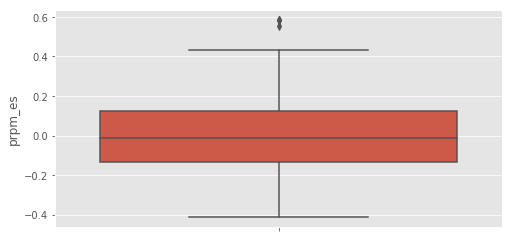

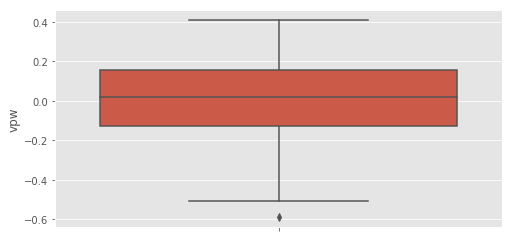

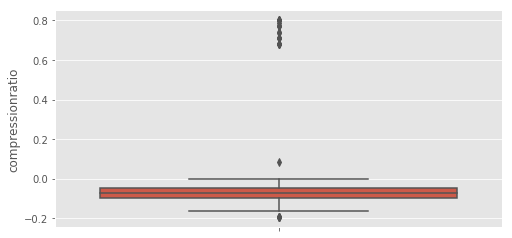

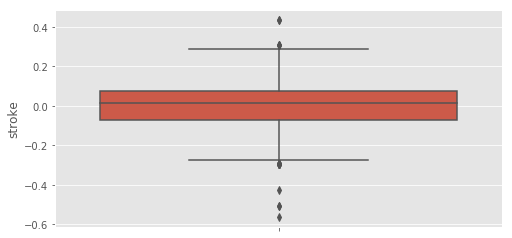

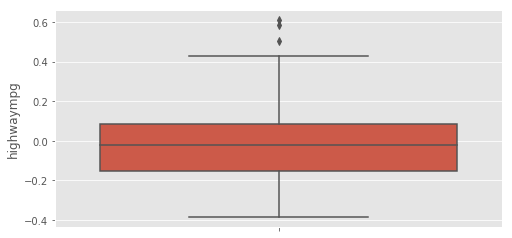

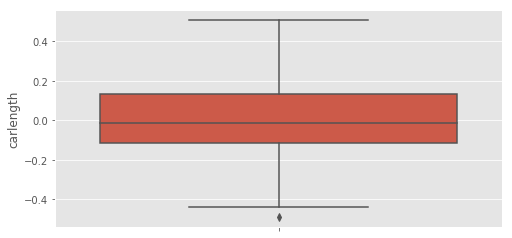

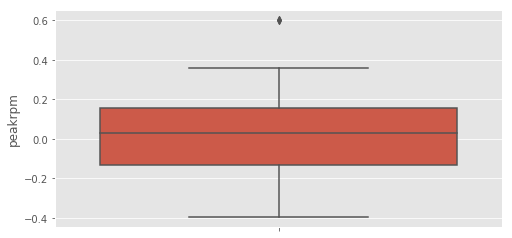

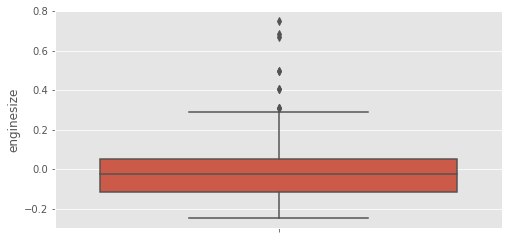

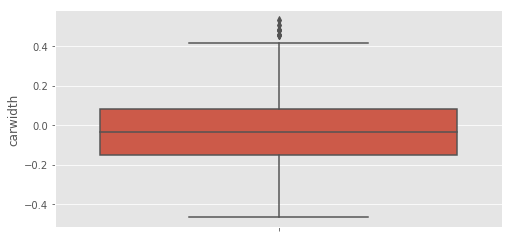

In [35]:
i=1
for var in auto_filt:
    plt.figure(figsize=(8, 4))
#     plt.subplot(8,2, i)
    i+=1
    sns.boxplot(y=var,data=auto_filt)
plt.show()

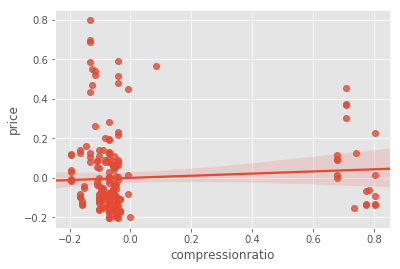

In [36]:
sns.regplot(data=auto, x='compressionratio',y='price',scatter=True)

Since **compressionratio** has almost all the data lying outside the IQR and because of this non-linear relationship with price it can skew the model. So we should drop **compressionratio**.

In [37]:
auto.shape

(205, 58)

In [38]:
auto.drop(['compressionratio'],inplace=True, axis=1)

In [39]:
auto.shape

(205, 57)

### Split the dataset into training and test dataset:

We'll be splitting the data into train and test dataset to make sure there is no **underfitting** and **overfitting** of the model.

In [40]:
# make X and y dataframes with independent and dependent columns respectively
X = auto.loc[:, auto.columns != 'price']
y = auto['price']

In [41]:
# Splitting into the train and test datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=100)

In [42]:
X_train.shape

(143, 56)

In [43]:
# Add a bias column to the training dataset before fitting the model
X_train = sm.add_constant(X_train, has_constant='add')

In [44]:
X_train.shape

(143, 57)

Training the model using statsmodels Ordinary Least Squares Regression Technique

In [45]:
""" A function that formulates the linear regression model for a the input training dataset
@Author Aryan Singh
"""
def linear_reg(y_train, X_train):

    #Constitute a Linear Regression Model
    lm_1 = sm.OLS(y_train,X_train).fit()

    #Visualise the results of the model
    print(lm_1.summary())
    return lm_1

# Training The Primary Model

In [46]:
linear_reg(y_train, X_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     49.86
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           6.52e-49
Time:                        21:21:27   Log-Likelihood:                 272.86
No. Observations:                 143   AIC:                            -441.7
Df Residuals:                      91   BIC:                            -287.7
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.004     -0.233      0.8

### Inferences For Model 1

1. On first glance the model accuracy look good with a R-Squared of 0.965 and an adjusted R-Squared of 0.946.
2. But there are many variables which have a high p-value suggesting that they maybe having high multicollinearity too.
3. We need to do **VIF analysis** to make sure the variables that are  not significant can be pruned out of the dataset.

### VIF analysis for model 1

In [47]:
"""
Calculates VIF for the dependent variables

@Author Aryan Singh
"""

def vif_cal(input_df):
    vif_df = pd.DataFrame(columns = [ 'Var', 'Vif']);
    i=0
    for var in input_df:
        y_vars = input_df[var]
        x_vars = input_df.drop(var, inplace=False, axis=1)
        r2s = sm.OLS(y_vars, x_vars).fit().rsquared
        vif = round(1/(1-r2s),2)
        vif_df.loc[i] = [var,vif]
        i+=1
    return vif_df.sort_values(by = 'Vif', ascending = False, inplace = False)

In [48]:
vif_cal(input_df = X_train)

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


,Var,Vif
26,ohcf,inf
14,gas,inf
31,idi,inf
53,subaru,inf
22,rear,inf
13,prpm_es,189.400000
6,enginesize,100.860000
33,mpfi,71.070000
29,2bbl,51.760000
24,l,36.110000


Since VIF is very high for most of the variables, we will be selecting the most important 30 variables for our analysis by using RFE method.

In [49]:
# Using RFE technique to find 30 most significant variables.
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()
rfe = RFE(lm, 30)
rfe.fit(X_train,y_train)
c_to_drop = list(X_train.columns[~rfe.support_])
X_train = X_train.drop(c_to_drop, axis=1)

X_train_1 = sm.add_constant(X_train)

lsm_2 = sm.OLS(y_train,X_train_1).fit()
print(lsm_2.summary())
vif_cal(input_df = X_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     95.45
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           1.95e-66
Time:                        21:21:27   Log-Likelihood:                 263.79
No. Observations:                 143   AIC:                            -467.6
Df Residuals:                     113   BIC:                            -378.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.004      0.205      0.8

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


,Var,Vif
10,rear,inf
27,subaru,inf
11,ohcf,inf
1,enginesize,33.690000
6,prpm_es,32.740000
0,carwidth,6.650000
4,peakrpm,5.450000
2,boreratio,5.030000
5,vpw,4.740000
3,stroke,4.270000


Wee that the adjusted R-Square has moved from 0.946 to 0.951 after applying the RFE technique to remove the insignificant variables.

Also, we do see improvement in the significance level of the variables after the RFE modelling but the VIF values for some of the 
variables is still quite high. So we will be dropping some of these variables to improve the model.

Dropping the **rear** column as it has infinite VIF.

In [50]:
X_train.drop('rear', inplace=True, axis =1)
c_to_drop.append('rear')
linear_reg(y_train, X_train)
vif_cal(input_df = X_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     96.34
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           4.20e-67
Time:                        21:21:27   Log-Likelihood:                 263.77
No. Observations:                 143   AIC:                            -469.5
Df Residuals:                     114   BIC:                            -383.6
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carwidth       0.4328      0.050      8.620      0.0

,Var,Vif
1,enginesize,33.69
6,prpm_es,32.74
26,subaru,22.03
10,ohcf,21.72
0,carwidth,6.65
4,peakrpm,5.45
2,boreratio,5.03
5,vpw,4.74
3,stroke,4.27
19,jaguar,3.99


Dropping the **rear** column did improve the VIF for variables and did not impacr the adjusted R-Squared by much.

Next let's drop **subaru** column as it has vary high VIF.

In [51]:
X_train.drop('subaru', inplace=True, axis =1)
c_to_drop.append('subaru')
linear_reg(y_train, X_train)
vif_cal(input_df = X_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     68.70
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           4.00e-59
Time:                        21:21:28   Log-Likelihood:                 237.75
No. Observations:                 143   AIC:                            -419.5
Df Residuals:                     115   BIC:                            -336.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carwidth       0.3293      0.057      5.741      0.0

,Var,Vif
6,prpm_es,32.69
1,enginesize,31.01
0,carwidth,6.08
4,peakrpm,5.16
2,boreratio,4.80
5,vpw,4.68
3,stroke,4.27
19,jaguar,3.70
17,honda,3.47
12,4bbl,3.33


In [52]:
X_train.drop('prpm_es', inplace=True, axis =1)
c_to_drop.append('prpm_es')
lm = linear_reg(y_train, X_train)
vif_cal(input_df = X_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     56.06
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           2.78e-54
Time:                        21:21:28   Log-Likelihood:                 221.12
No. Observations:                 143   AIC:                            -388.2
Df Residuals:                     116   BIC:                            -308.2
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carwidth       0.3531      0.064      5.519      0.0

,Var,Vif
1,enginesize,14.48
0,carwidth,6.05
5,vpw,4.56
2,boreratio,4.41
3,stroke,4.12
16,honda,3.45
21,nissan,3.17
10,ohcv,3.07
25,toyota,2.87
9,ohcf,2.78


Next we can drop the stroke column as it has very low significance and slightly high VIF as well.

In [53]:
X_train.drop('stroke', inplace=True, axis =1)
c_to_drop.append('stroke')
lm = linear_reg(y_train, X_train)
vif_cal(input_df = X_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     58.48
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           4.42e-55
Time:                        21:21:28   Log-Likelihood:                 220.86
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     117   BIC:                            -312.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carwidth       0.3605      0.063      5.737      0.0

,Var,Vif
1,enginesize,14.00
0,carwidth,5.86
4,vpw,4.44
2,boreratio,4.40
24,toyota,2.78
7,sedan,2.67
6,hatchback,2.59
17,jaguar,2.47
18,mazda,2.46
20,nissan,2.46


Dropping the stroke column does improve the adjusted R-Squared to 0.929

Now VIF values are starting to look good. Now dropping the **Chevrolet** column as it has very low significance and high p value.

In [54]:
X_train.drop('chevrolet', inplace=True, axis =1)
c_to_drop.append('chevrolet')
lm = linear_reg(y_train, X_train)
vif_cal(input_df = X_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     60.64
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           1.04e-55
Time:                        21:21:28   Log-Likelihood:                 220.09
No. Observations:                 143   AIC:                            -390.2
Df Residuals:                     118   BIC:                            -316.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carwidth       0.3791      0.061      6.248      0.0

,Var,Vif
1,enginesize,13.87
0,carwidth,5.45
4,vpw,4.37
2,boreratio,4.22
7,sedan,2.65
6,hatchback,2.52
16,jaguar,2.46
9,ohcv,2.44
23,toyota,2.17
8,ohcf,2.11


In [55]:
X_train.drop('isuzu', inplace=True, axis =1)
c_to_drop.append('isuzu')
lm = linear_reg(y_train, X_train)
vif_cal(input_df = X_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     62.92
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           2.51e-56
Time:                        21:21:28   Log-Likelihood:                 219.27
No. Observations:                 143   AIC:                            -390.5
Df Residuals:                     119   BIC:                            -319.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carwidth       0.3963      0.059      6.726      0.0

,Var,Vif
1,enginesize,13.83
0,carwidth,5.13
4,vpw,4.35
2,boreratio,4.16
7,sedan,2.57
6,hatchback,2.52
9,ohcv,2.44
15,jaguar,2.43
8,ohcf,2.03
22,toyota,1.97


On similar lines dropping **jaguar** and **4bbl** columns as they have high p-value.

In [56]:
X_train.drop('jaguar', inplace=True, axis =1)
c_to_drop.append('jaguar')
lm = linear_reg(y_train, X_train)
vif_cal(input_df = X_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     65.41
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           5.91e-57
Time:                        21:21:28   Log-Likelihood:                 218.47
No. Observations:                 143   AIC:                            -390.9
Df Residuals:                     120   BIC:                            -322.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carwidth       0.4216      0.055      7.692      0.0

,Var,Vif
1,enginesize,7.48
0,carwidth,4.42
4,vpw,4.26
2,boreratio,3.90
7,sedan,2.56
6,hatchback,2.51
9,ohcv,2.05
8,ohcf,2.01
21,toyota,1.93
15,mazda,1.92


In [57]:
X_train.drop('4bbl', inplace=True, axis =1)
c_to_drop.append('4bbl')
lm = linear_reg(y_train, X_train)
vif_cal(input_df = X_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     68.47
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           1.04e-57
Time:                        21:21:29   Log-Likelihood:                 218.00
No. Observations:                 143   AIC:                            -392.0
Df Residuals:                     121   BIC:                            -326.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carwidth       0.4301      0.054      7.978      0.0

,Var,Vif
1,enginesize,6.51
0,carwidth,4.29
2,boreratio,3.90
4,vpw,3.67
7,sedan,2.55
6,hatchback,2.50
9,ohcv,2.04
8,ohcf,2.00
20,toyota,1.93
13,honda,1.78


In [58]:
X_train.drop('sedan', inplace=True, axis =1)
c_to_drop.append('sedan')
lm = linear_reg(y_train, X_train)
vif_cal(input_df = X_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     71.58
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           2.13e-58
Time:                        21:21:29   Log-Likelihood:                 217.32
No. Observations:                 143   AIC:                            -392.6
Df Residuals:                     122   BIC:                            -330.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carwidth       0.4289      0.054      7.951      0.0

,Var,Vif
1,enginesize,6.33
0,carwidth,4.29
2,boreratio,3.89
4,vpw,3.41
8,ohcv,2.04
7,ohcf,1.98
19,toyota,1.92
12,honda,1.78
15,nissan,1.76
3,peakrpm,1.70


Now the VIF value looks to be in good shape for all variables(VIF<10) with an R-Squared of 0.925. Moreover there are only 2 variabes **hatchback** and **ohcf** which have high p-value(>0.05). So we would further refine the model by dropping them.

In [59]:
# Dropping hatch back and recalculating the VIF score.
X_train.drop('hatchback', inplace=True, axis =1)
c_to_drop.append('hatchback')
lm = linear_reg(y_train, X_train)
vif_cal(input_df = X_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     75.26
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           3.56e-59
Time:                        21:21:29   Log-Likelihood:                 216.87
No. Observations:                 143   AIC:                            -393.7
Df Residuals:                     123   BIC:                            -334.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carwidth       0.4299      0.054      7.979      0.0

,Var,Vif
1,enginesize,6.14
0,carwidth,4.28
2,boreratio,3.89
4,vpw,3.22
7,ohcv,2.03
6,ohcf,1.98
18,toyota,1.83
14,nissan,1.76
11,honda,1.76
3,peakrpm,1.68


In [60]:
X_train.drop('ohcf', inplace=True, axis =1)
c_to_drop.append('ohcf')
lm = linear_reg(y_train, X_train)
vif_cal(input_df = X_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     78.80
Date:                Sat, 16 Jun 2018   Prob (F-statistic):           8.34e-60
Time:                        21:21:29   Log-Likelihood:                 215.99
No. Observations:                 143   AIC:                            -394.0
Df Residuals:                     124   BIC:                            -337.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carwidth       0.4448      0.053      8.453      0.0

,Var,Vif
1,enginesize,5.90
0,carwidth,4.07
4,vpw,3.20
2,boreratio,3.01
6,ohcv,1.98
10,honda,1.75
17,toyota,1.64
3,peakrpm,1.61
13,nissan,1.60
7,audi,1.57


After the final step the model looks well balanced with an **R Squared** value of 0.924 and all the variables with low VIF and high significance.

Also **Durbin-Watson** stats value is 1.941 so there is no autocorrelation.

# Making predictions using Model

In [61]:
X_test = sm.add_constant(X_test , has_constant='add')

In [62]:
X_test = X_test.drop(c_to_drop, axis=1)

In [63]:
y_pred = lm.predict(X_test)

# Evaluate The Model

For evaluating the model lets plot the predicted output against the test output.

Text(0,0.5,'Price - Predicted, Actual')

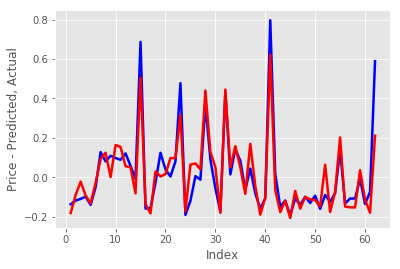

In [64]:
c = [i for i in range(1,63,1)]

fig = plt.figure()
plt.plot(c, y_test,linewidth=2.5, linestyle="-", color = 'blue')
plt.plot(c, y_pred,linewidth=2.5, linestyle="-", color = 'red')
plt.xlabel('Index')
plt.ylabel('Price - Predicted, Actual')

Text(0,0.5,'Actual Price')

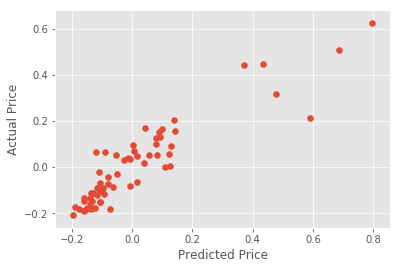

In [65]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')

From the above figures it is quite clear that the model predicts well against the test dataset and aligns well with the  actual outcome.

# Error Distribution And Residue Plots

Text(0,0.5,'Error Residuals')

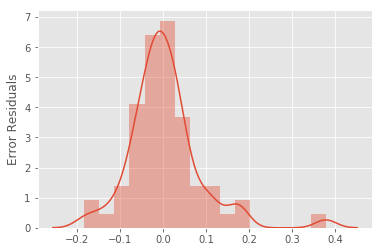

In [70]:
fig = plt.figure()
sns.distplot(y_test-y_pred)
plt.ylabel('Error Residuals')

Looking at the error distribution it is quite clear that the error is **normally distributed** with a mean of zero.

In [67]:
import numpy as np
from sklearn import metrics

print('RMSE for the Car Prices: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE for the Car Prices:  0.08474970280338222


**Root Mean Square error** is also on the lower side indicating that the model is a good fit.

Lets look at the error plot against the index

Text(0,0.5,'Errors')

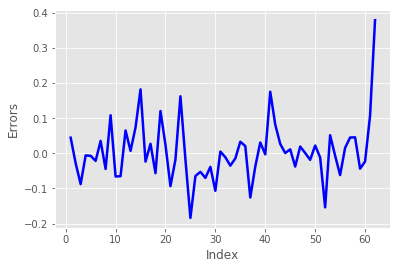

In [72]:
fig = plt.figure()
plt.plot(c, y_test-y_pred,linewidth=2.5, linestyle="-", color = 'blue')
plt.xlabel('Index')
plt.ylabel('Errors')

From he figure it is clear that the error is distributed as a **white noise** and there is no pattern in the error against index plot.

Text(0,0.5,'Error Residuals')

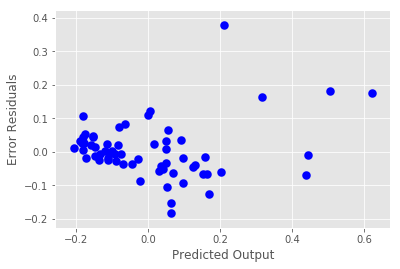

In [73]:
fig = plt.figure()
plt.scatter(y_pred, y_test-y_pred,linewidth=2.5, linestyle="-", color = 'blue')
plt.xlabel('Predicted Output')
plt.ylabel('Error Residuals')

Thus overall model predicts well with high R-Squared and low multicollinearity.

# Significant Variables And Impact Magnitude

Let's look at the variables and how well they describe the pricing of the car. Based on these we can recommend certain design and strategy decisions to **Geely Autos** before they enter the US market:

1. **carwidth:** Car width has a highly positive impact on the car price such that car price increases by **0.4448** for every unit increase in carwidth. Thus Geely motors should take car width into account while deciding the car price and keep the price more for larger cars.

2. **enginesize:** Engine size is a good indicator of the power in the car. It has a highly positive impact on car price with a coefficient of **0.55**. Infact Car manufacturer can markup the price of their vehichle as they get a more powerful engine for it.

3. **boreratio:** boreratio has a opposite impact on the price of the vehichle with a coefficient of **-0.19**. boreratio is the ratio between cylinder bore diameter and piston stroke. Lesser it is more powerful the engine and thus more the price of the vehichle. Geely auto should take this into consideration while pricing their vehichles. If they want to minimise the price for a vehichle they should keep the boreratio lower.

4. **peakrpm:** peakrpm has a positive coefficient of **0.1093** and thus has a positive impact on the prices. Thus cars with high rpm should be priced in the high price bracket.

5. **vpw:** volume per weight ratio has a negative relation with price with a coefficient of **-0.21** indicating that the cars which have lesser volume and more weight i.e. having larger engines but lightweight bodies like convertibles tend to be priced highly.

6. **hardtop:** As anticipated the hardtop convertibles being the most sought after cars have a highly positive coefficient of **0.1096** as they tend to be priced more than other kinds of cars. Thus Geely Auto should price their hardtops at a competitive price to the top hardtops in the category.

7. **ohcv:** ohcv engine tends to be negatively related to price of car. Although this relation is very weak with a coefficient of **0.098**.

8. **bmw:** The cars of BMW tend to be aggresively priced as compared to the competitors and the coefficient is as high as **0.1621**. Thus Geely Autos can bump up the price of their car if it is competing with BMW in the same category.

9. **Other Car Brands:** Other brands like **dodge, honda, mazda, renault etc** have a negative coefficient indicating that their models tend to be priced reasonably as compared to other brands. Thus Geely Autos if competing with these brands in a category should also consider frugal designs so that prices can be kept competitive.